# PRESENTATION MACHINE LEARNING

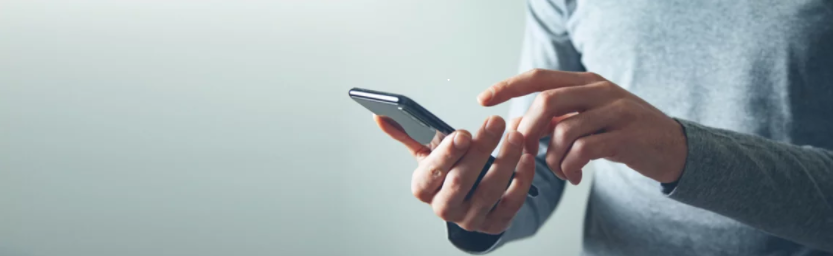

# PROBLEMATIQUE

PREDIRE L'ECHELLE DE PRIX D'UN TELEPHONE SELON LEURS CARACTERISTIQUES

In [1]:
# LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# IMPORT DES DATA
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
# AFFICHAGE DF TEST
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [4]:
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [5]:
# DF TRAIN AFFICHAHGE
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
# DESCRPTION
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [7]:
# SOMME DES VALEURS NULLES
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# TYPES
df_train.dtypes 

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# CORRELATION
corr = df_train.corr()
corr

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [10]:
# CORRELATION VERSION PLOT

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


<AxesSubplot:xlabel='price_range', ylabel='count'>

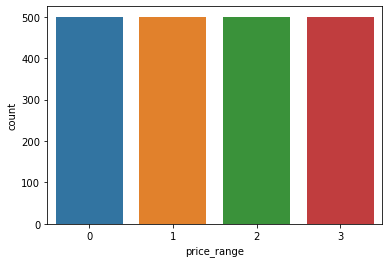

In [126]:
sns.countplot(data=df_train, x='price_range')

SEPARATION DE X ET Y AVANT MACHINE LEARNING MODELS


In [12]:
# SPLIT DES VALEURS, LA X ET LA Y REPRESENTANT LA TARGET
X = df_train.drop('price_range', 1)
y = df_train['price_range'] #la target
X 


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  
0            19        0             0     1  
1             7        1             1     0  
2             9        1             1     0  
3            11        1             0     0  
4            15        1             1     0  
...         ...      ...           ...   ...  
1995         19        1             1     0  
1996         16        1             1     1  
1997          5        1             1     0  
1998         19        1             1     1  
1999          2        1             1     1  

[2000 rows x 20 columns]

In [13]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

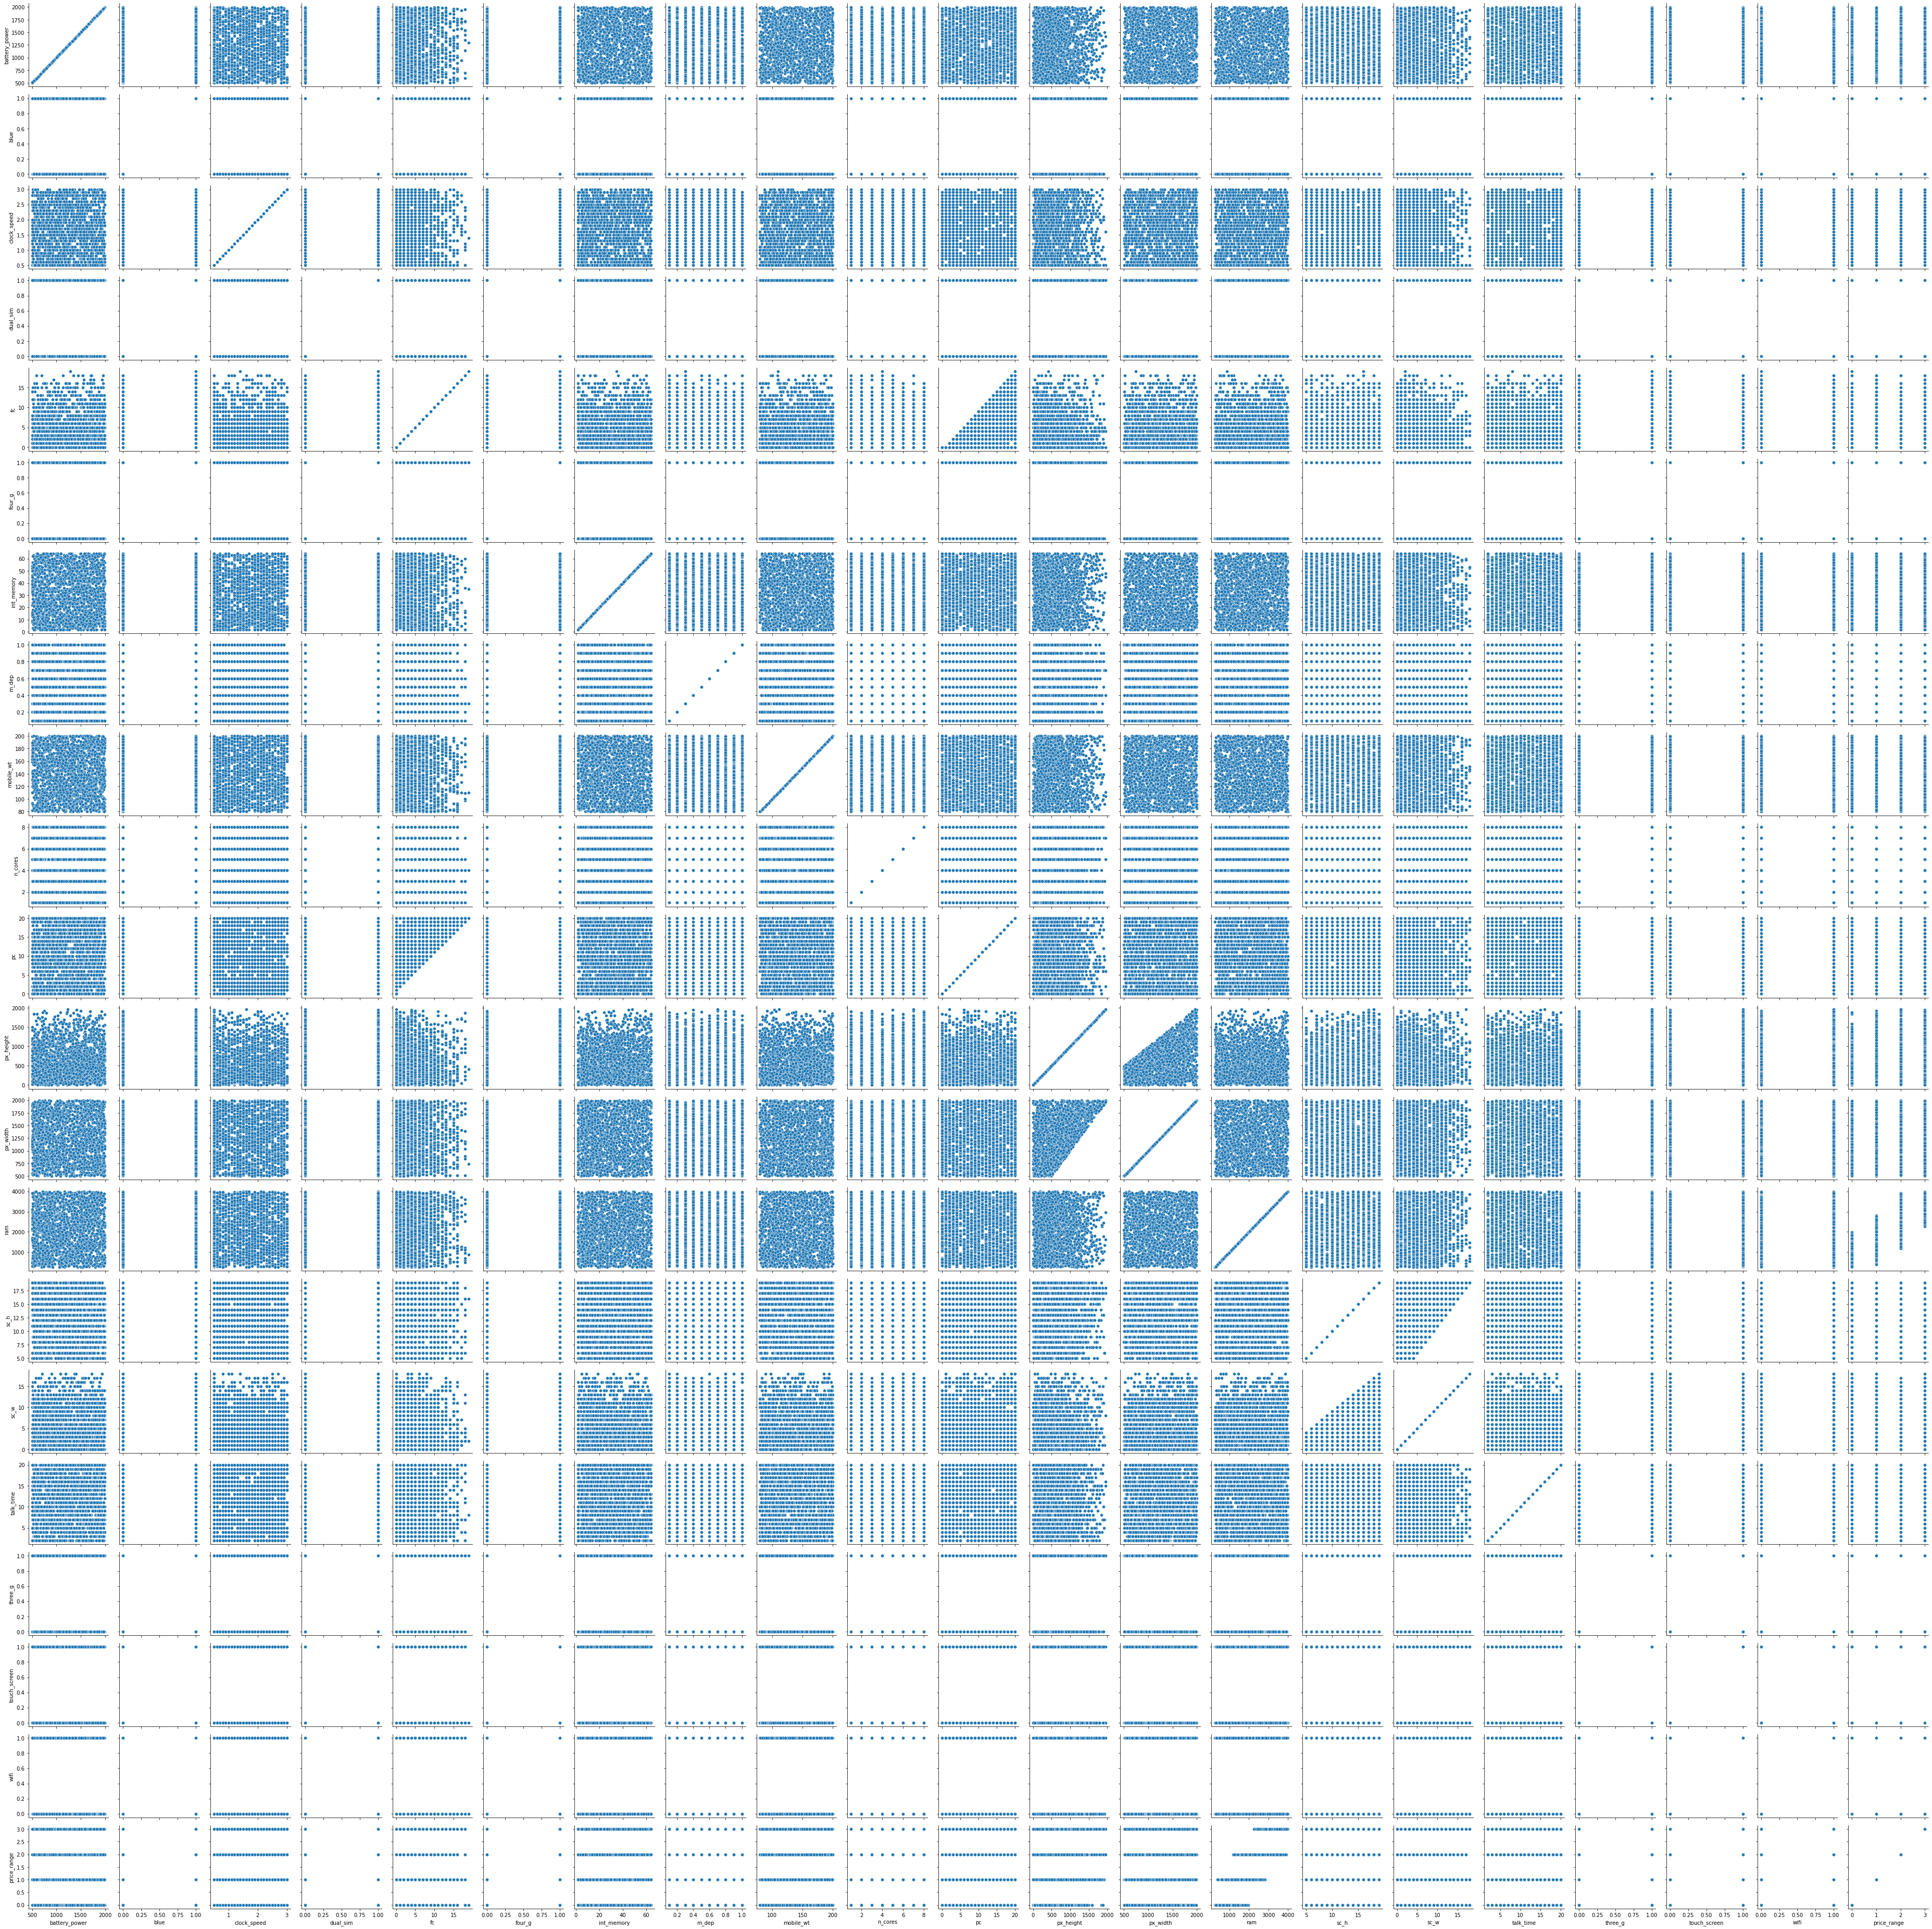

In [14]:
g = sns.PairGrid(df_train)
g.map(sns.scatterplot);

## KMEANS

In [15]:
# Kmeans sur le dataframe avec 4 clusters
from sklearn import cluster
from sklearn.cluster import KMeans
kmeans = cluster.KMeans(n_clusters=4, random_state=42)

In [16]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [17]:
# Centers
kmeans.cluster_centers_
# On a quatre clusters

array([[1.23299492e+03, 4.79661017e-01, 1.55881356e+00, 4.81355932e-01,
        4.17118644e+00, 5.18644068e-01, 3.11186441e+01, 4.93728814e-01,
        1.40723729e+02, 4.53050847e+00, 9.64067797e+00, 5.41388136e+02,
        1.17045424e+03, 8.42398305e+02, 1.22423729e+01, 5.54237288e+00,
        1.07169492e+01, 7.42372881e-01, 5.15254237e-01, 4.91525424e-01],
       [1.23355912e+03, 5.15202703e-01, 1.52770270e+00, 5.55743243e-01,
        4.35304054e+00, 5.28716216e-01, 3.29814189e+01, 5.02364865e-01,
        1.41025338e+02, 4.46452703e+00, 1.00371622e+01, 6.56077703e+02,
        1.29464020e+03, 3.44407264e+03, 1.23429054e+01, 5.89189189e+00,
        1.08868243e+01, 7.56756757e-01, 4.83108108e-01, 5.20270270e-01],
       [1.24305668e+03, 5.08097166e-01, 1.51072874e+00, 5.02024291e-01,
        4.51417004e+00, 5.32388664e-01, 3.16437247e+01, 4.85425101e-01,
        1.38267206e+02, 4.59514170e+00, 1.03724696e+01, 4.20761134e+02,
        1.02748988e+03, 2.31444130e+03, 1.22510121e+01, 5.8400

In [18]:
# Labels
kmeans.labels_

array([2, 3, 3, ..., 1, 0, 1])

In [19]:
# 
kmeans.inertia_

1246020474.3837264

In [125]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
# mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.8333333333333334

## KNN

In [22]:
# On fait un split en donnant 20% de nos données au test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
# Import de la librairies pour KNN
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# KNN avec 3 voisins 
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [25]:
# Fit du KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [26]:
knn.kneighbors()# tous les individus qui separent par rapport au voisin 

(array([[153.80702195, 199.15109842, 269.47207648],
        [182.99904371, 239.57086634, 277.5239269 ],
        [181.57645773, 275.05106799, 369.48315253],
        ...,
        [147.84211173, 163.20006127, 237.57272571],
        [191.19615582, 211.97653172, 242.24163556],
        [211.57925229, 221.8215499 , 226.15525641]]),
 array([[1430,  546, 1592],
        [1148,  788, 1042],
        [ 710, 1393,   77],
        ...,
        [1294, 1431, 1357],
        [ 508,  151,  841],
        [1279,  994,  499]], dtype=int64))

In [27]:
# k range de nb impair (pr les besoins du vote à majorité)
err_default = 6
# il faut que le nombre de voisins soit impair pour un vote departagé
neighbors = range(2, 71)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(X_train, y_train)
	err = round((1.0 - knn.score(X_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 8.0

Improvement of -2.0%




Results : knn = 3 => err_test = 6.25

Improvement of -0.25%




Results : knn = 4 => err_test = 7.5

Improvement of -1.5%




Results : knn = 5 => err_test = 6.5

Improvement of -0.5%




Results : knn = 6 => err_test = 7.0

Improvement of -1.0%




Results : knn = 7 => err_test = 5.75

Improvement of 0.25%




Results : knn = 8 => err_test = 5.25

Improvement of 0.75%




Results : knn = 9 => err_test = 4.25

Improvement of 1.75%




Results : knn = 10 => err_test = 5.0

Improvement of 1.0%




Results : knn = 11 => err_test = 4.75

Improvement of 1.25%




Results : knn = 12 => err_test = 5.0

Improvement of 1.0%




Results : knn = 13 => err_test = 5.0

Improvement of 1.0%




Results : knn = 14 => err_test = 5.5

Improvement of 0.5%




Results : knn = 15 => err_test = 5.75

Improvement of 0.25%




Results : knn = 16 => err_test = 6.0

Improvement of -0.0%




Results : knn = 17 => err_test = 6.0

Improvement of -0.0%

Text(0.5, 0, 'neighbors')

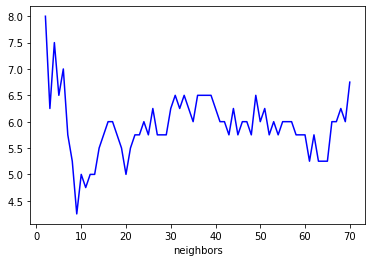

In [28]:
from matplotlib import pyplot as plt
# il faut que le nombre de voisins soit impair pour un vote departagé
plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

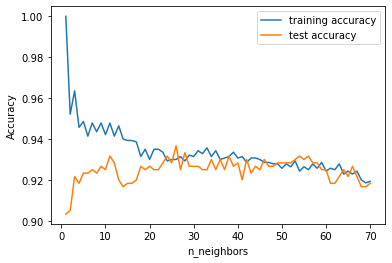

In [84]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 71) # nombres de voisins

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [30]:
#Apres les tests il faut passer à la prédiction

y_pred = knn.predict(X_test)
y_pred

array([3, 1, 0, 1, 3, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 3, 0, 3, 1, 0, 2, 0, 0, 2,
       3, 0, 3, 3, 2, 1, 0, 3, 0, 2, 0, 3, 3, 0, 2, 1, 1, 2, 3, 1, 0, 0,
       0, 1, 2, 3, 3, 2, 1, 1, 2, 0, 3, 3, 1, 3, 3, 2, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 3, 0, 0, 2, 2, 3, 1, 1, 0, 3, 3, 1, 2, 1, 1,
       0, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 3, 2, 0, 2, 3, 3, 0,
       0, 2, 3, 1, 2, 3, 2, 3, 3, 3, 2, 1, 3, 3, 1, 1, 0, 1, 3, 0, 1, 1,
       3, 3, 3, 2, 0, 2, 1, 0, 0, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 3, 2, 1,
       1, 3, 0, 3, 2, 2, 2, 3, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 3, 0, 2, 3,
       1, 1, 1, 2, 1, 3, 0, 0, 3, 1, 1, 1, 0, 3, 2, 0, 0, 3, 1, 2, 3, 3,
       0, 3, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 3,
       0, 1, 3, 2, 3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       0, 0, 3, 1, 2, 3, 2, 0, 0, 0, 1, 3, 2, 2, 3, 1, 3, 2, 2, 1, 1, 0,
       1, 1, 1, 3, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1,

In [92]:
y_test.values

array([2, 1, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 3, 0, 3, 3, 2,
       3, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 2, 1, 3, 1, 0, 0,
       0, 1, 0, 0, 3, 0, 3, 2, 2, 2, 1, 2, 3, 3, 2, 0, 0, 2, 1, 0, 0, 1,
       3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 3, 1, 3, 1, 3, 2, 0, 3, 0, 0, 2, 3,
       0, 2, 0, 3, 2, 0, 0, 3, 3, 3, 1, 1, 2, 2, 0, 0, 3, 0, 0, 3, 3, 1,
       3, 1, 2, 2, 0, 1, 0, 0, 3, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 2, 0, 3,
       2, 1, 1, 3, 2, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 1, 3, 2, 0,
       3, 1, 2, 3, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 3, 2, 1, 2, 1, 2, 2, 2,
       3, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 3, 1, 3, 0, 1, 0, 1, 3, 1, 3,
       1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 2, 1, 1, 2, 3, 1, 0, 3, 2, 0,
       2, 0, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 3, 2, 2, 1, 2, 3, 0, 2,
       0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 1, 2, 0, 1, 3, 3, 1, 1, 0, 1,
       3, 2, 1, 1, 1, 0, 1, 3, 2, 1, 3, 1, 0, 3, 2,

In [93]:
# Précision du modele
acc = knn.score(X_test, y_test)
acc

0.9183333333333333

In [94]:
# Calcul de accuracy à partir d'une fonction deja faite avec sklearn
# Méthode détaillée pr retrouver l'`accuary`
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


array([[144,   6,   0,   0],
       [  9, 125,  16,   0],
       [  0,   9, 129,  12],
       [  0,   0,  10, 140]], dtype=int64)

In [95]:
# Somme de toute la diagonale
conf_mat.diagonal().sum()/conf_mat.sum()

0.8966666666666666

In [96]:
class_names = df_train.price_range
len(class_names)

2000

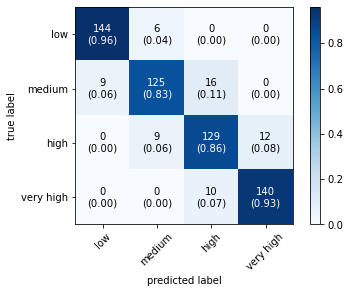

In [97]:
from mlxtend.plotting import plot_confusion_matrix

class_names = df_train.price_range

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=['low', 'medium', 'high', 'very high'])

# En dehors de la diagonale, pour les mauvaises predictions

C:\Users\bodje\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


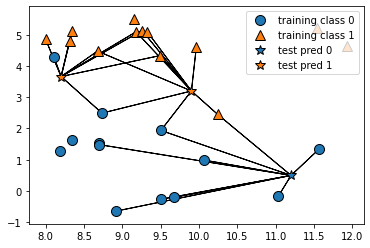

In [98]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=9)

C:\Users\bodje\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


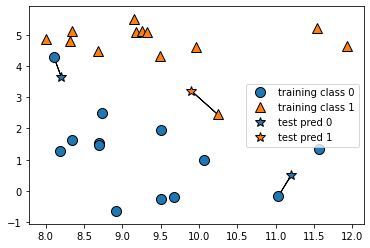

In [99]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

## DECISION TREE 

In [100]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [101]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
y_pred = tree.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 2, 3, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 3, 1, 3, 3, 2,
       3, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 2, 1, 3, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 2, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 0, 0, 0, 2,
       3, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 3, 2, 3, 1, 0, 2, 0, 0, 2, 3,
       0, 2, 0, 3, 2, 0, 1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 3, 0, 0, 3, 3, 1,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 3, 3, 1, 3, 0, 1, 0, 1, 3, 1, 3,
       1, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 3, 3, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 3, 0, 1, 3, 1, 3, 3, 3, 0, 0, 2, 0, 1, 2, 3, 1, 0, 3, 2, 0,
       2, 0, 0, 2, 1, 3, 1, 0, 3, 0, 1, 0, 3, 1, 3, 2, 2, 1, 2, 3, 0, 2,
       0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 2, 2, 0, 2, 3, 3, 1, 2, 0, 1,
       3, 2, 1, 1, 1, 0, 2, 3, 2, 1, 3, 1, 0, 3, 2,

In [103]:
y_test.values

array([2, 1, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 3, 0, 3, 3, 2,
       3, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 2, 1, 3, 1, 0, 0,
       0, 1, 0, 0, 3, 0, 3, 2, 2, 2, 1, 2, 3, 3, 2, 0, 0, 2, 1, 0, 0, 1,
       3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 3, 1, 3, 1, 3, 2, 0, 3, 0, 0, 2, 3,
       0, 2, 0, 3, 2, 0, 0, 3, 3, 3, 1, 1, 2, 2, 0, 0, 3, 0, 0, 3, 3, 1,
       3, 1, 2, 2, 0, 1, 0, 0, 3, 1, 2, 1, 1, 1, 3, 0, 2, 1, 3, 2, 0, 3,
       2, 1, 1, 3, 2, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 1, 3, 2, 0,
       3, 1, 2, 3, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 3, 2, 1, 2, 1, 2, 2, 2,
       3, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 3, 1, 3, 0, 1, 0, 1, 3, 1, 3,
       1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 2, 1, 1, 2, 3, 1, 0, 3, 2, 0,
       2, 0, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 3, 2, 2, 1, 2, 3, 0, 2,
       0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 1, 2, 0, 1, 3, 3, 1, 1, 0, 1,
       3, 2, 1, 1, 1, 0, 1, 3, 2, 1, 3, 1, 0, 3, 2,

In [104]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
# mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.8333333333333334

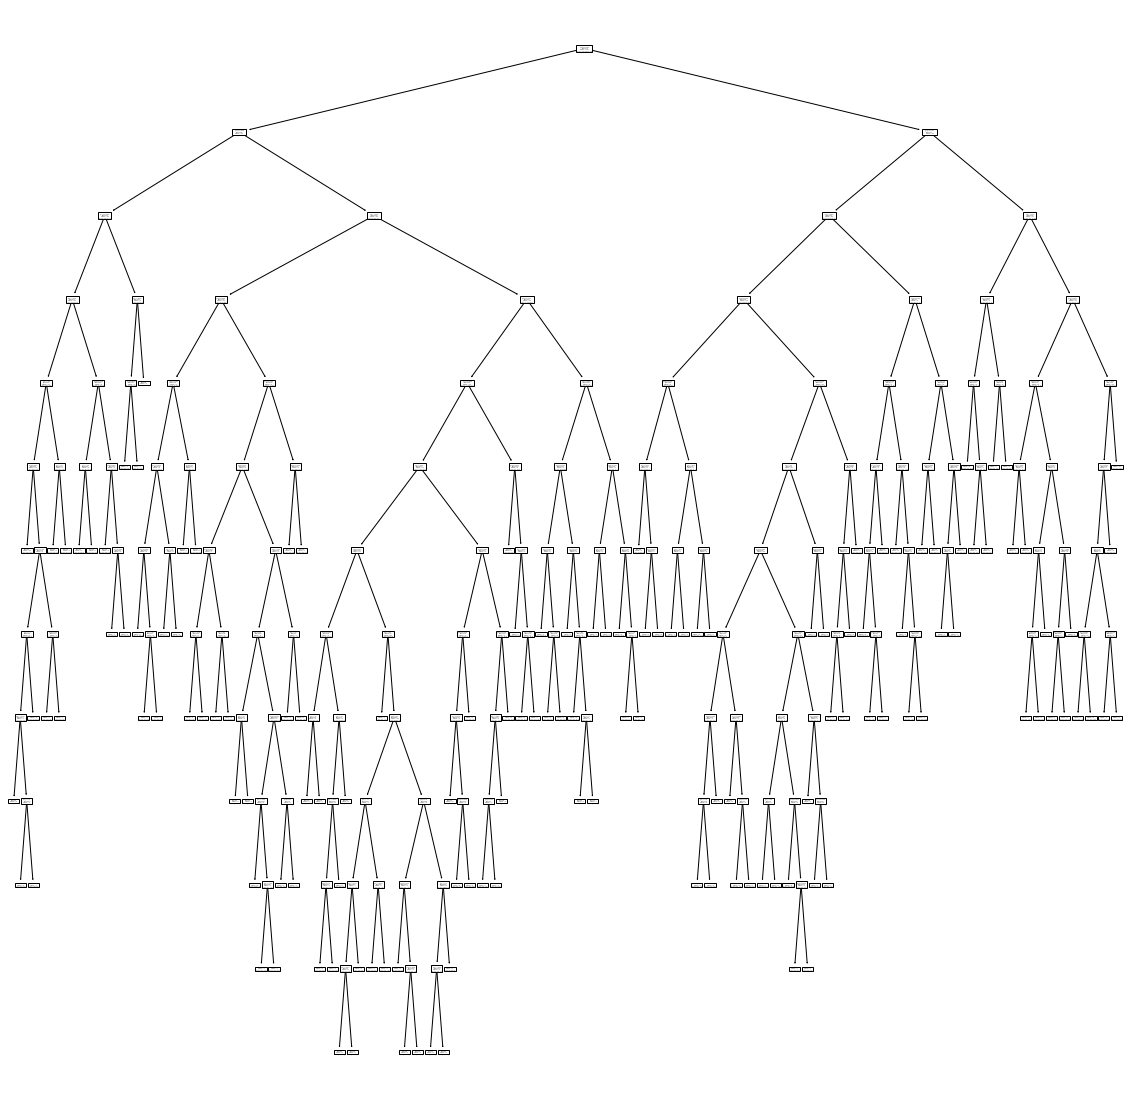

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_tel = plot_tree(tree)
# L'arbre est trop grand (illisible) => Overfittng

In [106]:
from sklearn.tree import export_text

In [107]:
# Optimisation de la profondeur de l'arbre
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [123]:
# # A l'aide d'un gridsearch => plusieurs params à la fois

# from sklearn.model_selection import GridSearchCV
# param = [{"max_depth" : list(range(2, 10))}]
# grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
# grid = grid.fit(X_train, y_train)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, treeOpt.best_params_))

In [ ]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (20, 10))
tree_titanic = plot_tree(tree)

In [109]:
scores

[0.7433333333333333,
 0.7366666666666667,
 0.8183333333333334,
 0.8083333333333333,
 0.835,
 0.83,
 0.8333333333333334,
 0.8333333333333334]

## RANDOM FOREST

In [52]:
# Bibliotheque
# libraries for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
# SPLIT data
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.3)

In [54]:
# FIT
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
# ESTIMATORS
random_forest.n_estimators

100

In [56]:
# PREDICTION
y_pred = random_forest.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 2, 3, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 3, 0, 3, 3, 1,
       2, 3, 2, 1, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 2, 1, 3, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 2, 2, 3, 1, 2, 3, 3, 3, 0, 0, 2, 1, 0, 0, 1,
       3, 2, 1, 1, 2, 0, 1, 0, 1, 2, 3, 1, 3, 1, 3, 1, 0, 3, 0, 0, 2, 3,
       0, 2, 0, 3, 2, 0, 0, 3, 3, 2, 1, 2, 2, 2, 0, 0, 3, 0, 0, 3, 3, 1,
       3, 1, 2, 2, 0, 1, 0, 0, 3, 1, 2, 1, 1, 1, 3, 0, 3, 1, 3, 3, 0, 3,
       2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 1, 3, 2, 0,
       3, 1, 2, 3, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 3, 1, 1, 2, 1, 2, 2, 2,
       3, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 3, 3, 1, 3, 0, 1, 0, 1, 3, 1, 3,
       1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 0, 3, 1, 3, 3, 3, 0, 0, 2, 1, 0, 2, 3, 1, 0, 2, 2, 0,
       2, 0, 0, 3, 0, 3, 1, 0, 3, 0, 1, 0, 3, 0, 3, 2, 2, 1, 2, 3, 0, 2,
       0, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 1, 1, 2, 0, 1, 3, 3, 1, 2, 0, 1,
       3, 2, 1, 1, 1, 0, 2, 3, 2, 1, 3, 1, 0, 3, 2,

In [57]:
# ACCURACY
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.89

In [58]:
# MATRICE DE CONFUSION
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[144,   6,   0,   0],
       [  7, 129,  14,   0],
       [  0,  13, 122,  15],
       [  0,   0,  11, 139]], dtype=int64)

In [59]:
y_test

734     2
1216    1
1295    2
295     1
457     3
       ..
989     1
34      0
1979    1
1127    2
1751    1
Name: price_range, Length: 600, dtype: int64

In [60]:
# MATRICE DE CONFUSION SOUS FORME DE DATAFRAME
pd.DataFrame(conf_mat, columns=['low', 'medium', 'high', 'very high'], index=['low', 'medium', 'high', 'very high'])

low  medium  high  very high
low        144       6     0          0
medium       7     129    14          0
high         0      13   122         15
very high    0       0    11        139

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

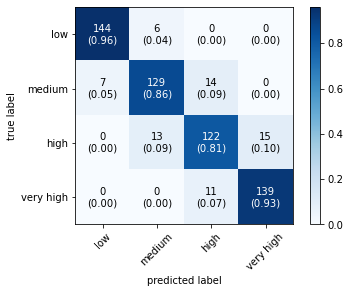

In [61]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=['low', 'medium', 'high', 'very high'])

In [62]:
# metrics.accuracy_score(y_test, y_pred)
from sklearn import metrics
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

10.999999999999998

In [63]:
# PROFONDEUR MAX DEPHT
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [64]:
# ERRORS
errors = []
err_default = 15.99
for max_depth in max_depths:
    random_forest = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    random_forest.fit(X_train, y_train)
    err = round((1.0 - random_forest.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {random_forest.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 43.833

Improvement of -27.842999999999996%




Results : max_depth = 2 => err_test = 26.833

Improvement of -10.842999999999998%




Results : max_depth = 3 => err_test = 20.333

Improvement of -4.342999999999998%




Results : max_depth = 4 => err_test = 17.667

Improvement of -1.6770000000000014%




Results : max_depth = 5 => err_test = 14.833

Improvement of 1.157%




Results : max_depth = 6 => err_test = 14.167

Improvement of 1.8230000000000004%




Results : max_depth = 7 => err_test = 11.167

Improvement of 4.823%




Results : max_depth = 8 => err_test = 11.833

Improvement of 4.157%




Results : max_depth = 9 => err_test = 10.833

Improvement of 5.157%




Results : max_depth = 10 => err_test = 11.5

Improvement of 4.49%




Results : max_depth = None => err_test = 11.0

Improvement of 4.99%




Text(0.5, 0, 'max_depths')

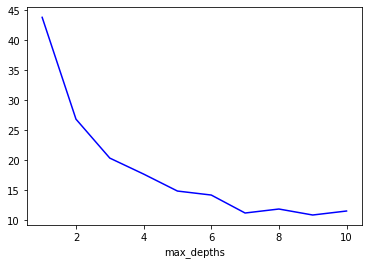

In [65]:
# from errors !!!
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

In [66]:
# ESTIMATION NOMBRES D'ARBRE A CONSTRUIRE
n_estimators = np.linspace(start = 1, stop = 100, num = 60, dtype = int)# num => qui contient n elements
n_estimators

array([  1,   2,   4,   6,   7,   9,  11,  12,  14,  16,  17,  19,  21,
        22,  24,  26,  27,  29,  31,  32,  34,  36,  37,  39,  41,  42,
        44,  46,  47,  49,  51,  53,  54,  56,  58,  59,  61,  63,  64,
        66,  68,  69,  71,  73,  74,  76,  78,  79,  81,  83,  84,  86,
        88,  89,  91,  93,  94,  96,  98, 100])

In [67]:
errors = []
for estimator in n_estimators :
   random_forest = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   random_forest.fit(X_train, y_train)
   err = round((1.0 - random_forest.score(X_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {random_forest.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 47.667


Improvement of -31.68%.


Results : n_estimators = 2 => err_test = 49.5


Improvement of -33.51%.


Results : n_estimators = 4 => err_test = 37.667


Improvement of -21.68%.


Results : n_estimators = 6 => err_test = 30.5


Improvement of -14.51%.


Results : n_estimators = 7 => err_test = 29.667


Improvement of -13.68%.


Results : n_estimators = 9 => err_test = 27.5


Improvement of -11.51%.


Results : n_estimators = 11 => err_test = 23.667


Improvement of -7.68%.


Results : n_estimators = 12 => err_test = 22.167


Improvement of -6.18%.


Results : n_estimators = 14 => err_test = 20.833


Improvement of -4.84%.


Results : n_estimators = 16 => err_test = 18.0


Improvement of -2.01%.


Results : n_estimators = 17 => err_test = 17.333


Improvement of -1.34%.


Results : n_estimators = 19 => err_test = 15.5


Improvement of 0.49%.


Results : n_estimators = 21 => err_test = 15.833


Improvement of 0.16%.


Results : n_estimators

Text(0, 0.5, 'err_test')

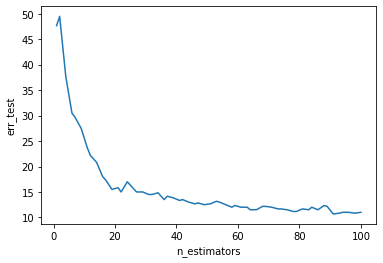

In [68]:
# valeur du taux d'erreur (en plot)
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [69]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    random_forest = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = random_forest.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(random_forest.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {random_forest.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

C:\Users\bodje\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bodje\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bodje\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(




Results : n_estimators = 1 => acc_oob = 35.214, err_test = 43.833, err_train = 16.0




Results : n_estimators = 6 => acc_oob = 57.429, err_test = 25.167, err_train = 1.429




Results : n_estimators = 11 => acc_oob = 71.357, err_test = 19.5, err_train = 0.357




Results : n_estimators = 16 => acc_oob = 73.786, err_test = 14.333, err_train = 0.0




Results : n_estimators = 21 => acc_oob = 76.429, err_test = 19.667, err_train = 0.0




Results : n_estimators = 26 => acc_oob = 79.143, err_test = 13.0, err_train = 0.0




Results : n_estimators = 31 => acc_oob = 79.643, err_test = 13.5, err_train = 0.0




Results : n_estimators = 36 => acc_oob = 80.214, err_test = 13.333, err_train = 0.0




Results : n_estimators = 41 => acc_oob = 80.929, err_test = 14.0, err_train = 0.0




Results : n_estimators = 46 => acc_oob = 84.214, err_test = 12.333, err_train = 0.0




Results : n_estimators = 51 => acc_oob = 82.786, err_test = 12.333, err_train = 0.0




Results : n_estimators = 56 => acc_

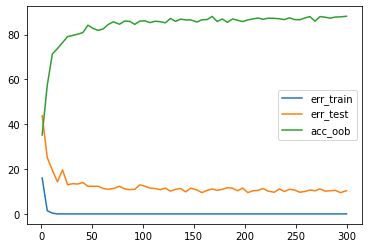

In [71]:
# En plot à partir de linspace

plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [72]:
# VARIABLES DISCRIMINATE (Features)
from sklearn.model_selection import GridSearchCV

In [73]:
param = { "max_features" : list(range(2, 5, 1)) }
param

{'max_features': [2, 3, 4]}

In [74]:
random_forest = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 0), param, cv=5, n_jobs = -1)
random_forest
random_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=0),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4]})

In [75]:
pd.DataFrame(random_forest.cv_results_)[['param_max_features', 'mean_test_score', 'params']]
# random_forest.best_estimator_

param_max_features  mean_test_score               params
0                  2         0.809286  {'max_features': 2}
1                  3         0.847143  {'max_features': 3}
2                  4         0.865714  {'max_features': 4}

In [76]:
# Marge d'erreur 
1-random_forest.score(X_test, y_test)

0.11499999999999999

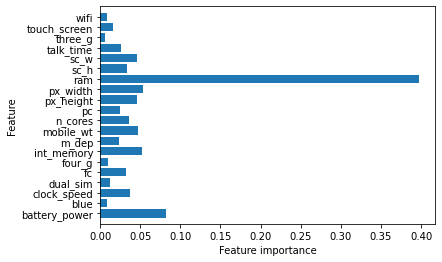

In [78]:
def plot_feature_importances_telephone(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_telephone(tree)

In [ ]:
# COMPARAISON DES MODELES
# KMEANS : 0.83
# KNN : 0.91
# DECISION TREE : 0.83
# RANDOM FOREST : 0.89

# CONCLUSION 

## COMPARAISON DES MODELES
La meilleure prediction est attribuée au KNN pour mieux classer la categorie dans laquelle se trouve le telephone avec ses carateristiques données
La RAM est en d'autre, la meilleure caracteristique pour definir la classe d'un teephone
KNN : 0.91

On aurait pu encore regarder d'autres Modeles de Machine Learning autre que ceux qu'on a vu 

En ajout, fonction qui predit la categorie de prix d'un téléphone via données entrée par l'utilisateur. 
